# Régression linéaire multiple

In [184]:
import pandas as pd 
import numpy as np

from sklearn.datasets import make_regression
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
from matplotlib import pyplot as plt

## Création du dataset

In [185]:
#on créé maintenant un dataset composant de d'échantillants ayant chacun 2 features
x, y = make_regression (n_samples=200, n_features=2, noise=10)

y=y.reshape(y.shape[0], 1)

print(x.shape)
print(y.shape)
print(x)
print(y)

(200, 2)
(200, 1)
[[ 2.27827474e-01  2.03296725e+00]
 [ 6.20331217e-01 -1.16567652e-01]
 [-1.66837169e+00 -5.29784449e-02]
 [-2.30672741e+00  1.37504780e+00]
 [ 9.55567771e-01 -5.85093475e-01]
 [-7.06216757e-01 -6.90929931e-02]
 [-1.56721454e-01 -1.33301486e+00]
 [-2.88477711e-01 -4.03005319e-01]
 [-4.35923257e-01  5.92631982e-01]
 [-3.43908881e-01  1.52729592e+00]
 [ 1.76212323e+00 -5.43378986e-01]
 [ 1.07571948e+00  8.45966758e-01]
 [-3.87983390e-02 -8.20795283e-01]
 [ 2.36937384e-01 -5.34389515e-01]
 [-6.72003105e-01  8.27273084e-01]
 [ 1.08334432e+00 -7.20523013e-01]
 [ 6.78282088e-01 -1.56357066e+00]
 [ 2.40049021e-01 -2.78453155e-01]
 [-7.03495431e-01  4.76729913e-01]
 [-1.84386905e-01  4.51541229e-01]
 [-2.48809161e-01  6.86565328e-01]
 [-4.74268354e-01  6.82908101e-01]
 [-5.61575715e-01  5.67369150e-01]
 [-2.74319289e-01  1.22337844e+00]
 [-1.04876528e+00  9.40593433e-01]
 [ 1.02592495e+00  1.42532032e+00]
 [ 5.19710921e-01  1.18466892e+00]
 [-2.10080204e+00  3.10007098e-01]
 [

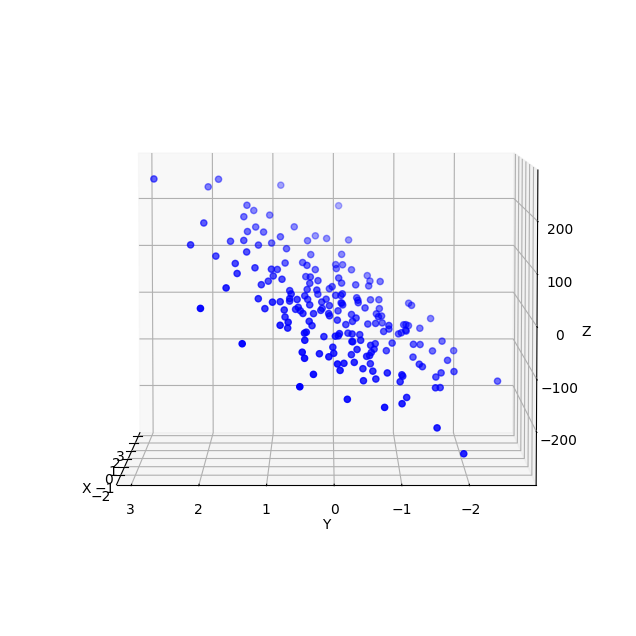

In [186]:
# Représentation graphique du modèle en 3d 
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y, c='b', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(5, 180)
plt.show()


## Modèle

In [187]:
#notre modèle qui calcule les y_predictions en fonction de x
def model(X, theta):
    return np.dot(X, theta)

## Fonction de coûts

In [188]:
def cout(X, y, theta):
    return (1/(2*len(y))) * np.sum((model(X, theta) - y)**2)


## Descente de Gradient (DG)

In [189]:
#Maintenant, on utilise la descente de gradients pour minimiser la fonction F et trouver les paramètres a, b optimaux
def gradient(X, y, theta):
    return (1/len(y)) * np.dot(X.T, (model(X, theta) - y))

def descenteGradient(X, y, theta, learning_rate, n_iterations):
    histCout=np.zeros(n_iterations)
    for iteration in range(0, n_iterations):
        theta = theta - learning_rate*gradient(X, y, theta)
        histCout[iteration]= cout(X,y,theta)

    return theta, histCout

def coefDet(y, y_predictions):
    u=((y-y_predictions)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1-u/v

## Prédiction du modèle à l'aide d'une régression polynômiale 

In [190]:
#on va utiliser une régression linéaire multiple, avec n paramètres 
theta = np.random.randn(3,1)
print(theta.shape)
print(theta)

(3, 1)
[[ 0.13567715]
 [-0.36236219]
 [-1.83871172]]


In [191]:
X = np.hstack((x, np.ones((x.shape[0],1))))
print(X.shape)
print(X)


(200, 3)
[[ 2.27827474e-01  2.03296725e+00  1.00000000e+00]
 [ 6.20331217e-01 -1.16567652e-01  1.00000000e+00]
 [-1.66837169e+00 -5.29784449e-02  1.00000000e+00]
 [-2.30672741e+00  1.37504780e+00  1.00000000e+00]
 [ 9.55567771e-01 -5.85093475e-01  1.00000000e+00]
 [-7.06216757e-01 -6.90929931e-02  1.00000000e+00]
 [-1.56721454e-01 -1.33301486e+00  1.00000000e+00]
 [-2.88477711e-01 -4.03005319e-01  1.00000000e+00]
 [-4.35923257e-01  5.92631982e-01  1.00000000e+00]
 [-3.43908881e-01  1.52729592e+00  1.00000000e+00]
 [ 1.76212323e+00 -5.43378986e-01  1.00000000e+00]
 [ 1.07571948e+00  8.45966758e-01  1.00000000e+00]
 [-3.87983390e-02 -8.20795283e-01  1.00000000e+00]
 [ 2.36937384e-01 -5.34389515e-01  1.00000000e+00]
 [-6.72003105e-01  8.27273084e-01  1.00000000e+00]
 [ 1.08334432e+00 -7.20523013e-01  1.00000000e+00]
 [ 6.78282088e-01 -1.56357066e+00  1.00000000e+00]
 [ 2.40049021e-01 -2.78453155e-01  1.00000000e+00]
 [-7.03495431e-01  4.76729913e-01  1.00000000e+00]
 [-1.84386905e-01  4.5

In [192]:
#on optimise le modèle avec la descente de gradient
resultDescenteGradientPol = descenteGradient(X, y, theta, 0.01, 1000)
newTheta = resultDescenteGradientPol[0]
varCout = resultDescenteGradientPol[1]

print(newTheta.shape)
print(newTheta)

(3, 1)
[[58.65961836]
 [76.44088394]
 [ 0.22367257]]


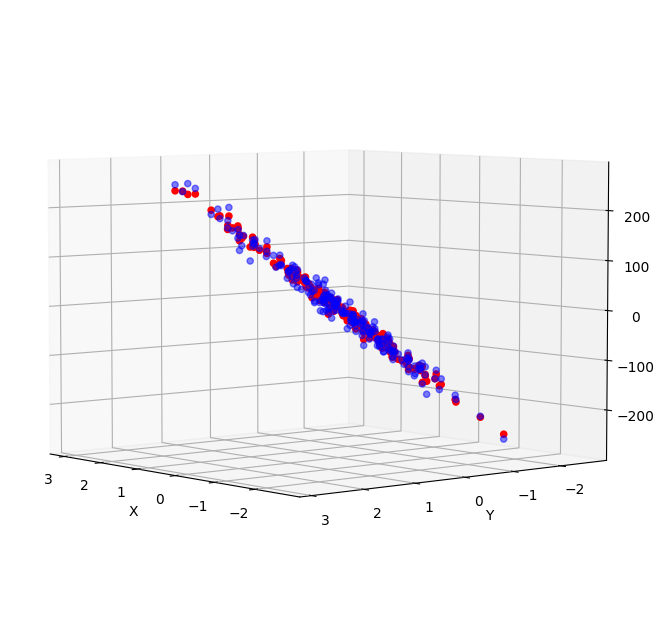

In [199]:
y_predictions = model(X, newTheta)
x1, x2 = np.linspace(-2, 2, 1), np.linspace(-2, 2, 1)
X1, X2 = np.meshgrid(x1, x2)

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y, color='b', alpha=0.5)
ax.scatter(x[:,0], x[:,1], y_predictions, color='r', alpha=1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(5,-220)
plt.show()

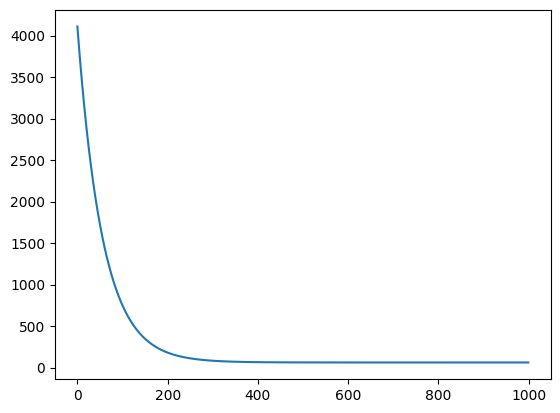

In [194]:
#on affiche la variation des couts au fil de la descente des gradients
plt.plot([i for i in range(1000)], varCout)

In [195]:
#on calcule le coefficient de prédiction, plus le chiffre est proche de 1, mieux la prédiction est fidèle à la réalité
coeffPredictions_pol = coefDet(y, y_predictions)
print(coeffPredictions_pol)

0.9851854202589423
